In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)
os.makedirs("figures", exist_ok=True)


In [11]:
results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score"],
    "TF-IDF + Logistic Regression": [0.9856, 0.9818, 0.9922, 0.9870],
    "DistilBERT (Fine-Tuned)": [0.9987, 0.9987, 0.9987, 0.9987],
})
results.to_csv("../figures/model_comparison_metrics.csv", index=False)
results


,Metric,TF-IDF + Logistic Regression,DistilBERT (Fine-Tuned)
0,Accuracy,0.9856,0.9987
1,Precision,0.9818,0.9987
2,Recall,0.9922,0.9987
3,F1-score,0.9870,0.9987


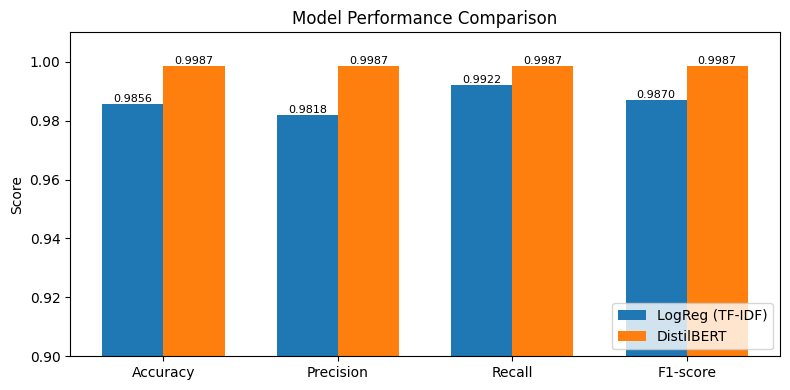

In [12]:
df = pd.read_csv("figures/model_comparison_metrics.csv")

x = np.arange(len(df["Metric"]))
width = 0.35

fig, ax = plt.subplots(figsize=(8,4))
bars1 = ax.bar(x - width/2, df["TF-IDF + Logistic Regression"], width, label="LogReg (TF-IDF)")
bars2 = ax.bar(x + width/2, df["DistilBERT (Fine-Tuned)"], width, label="DistilBERT")

ax.set_ylim(0.9, 1.01)
ax.set_xticks(x)
ax.set_xticklabels(df["Metric"])
ax.set_ylabel("Score")
ax.set_title("Model Performance Comparison")
ax.legend(loc="lower right")

for bars in (bars1, bars2):
    for bar in bars:
        ax.annotate(f"{bar.get_height():.4f}", 
                    (bar.get_x() + bar.get_width()/2, bar.get_height()),
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig("../figures/metrics_comparison_bar.png", dpi=300, bbox_inches="tight")
plt.show()

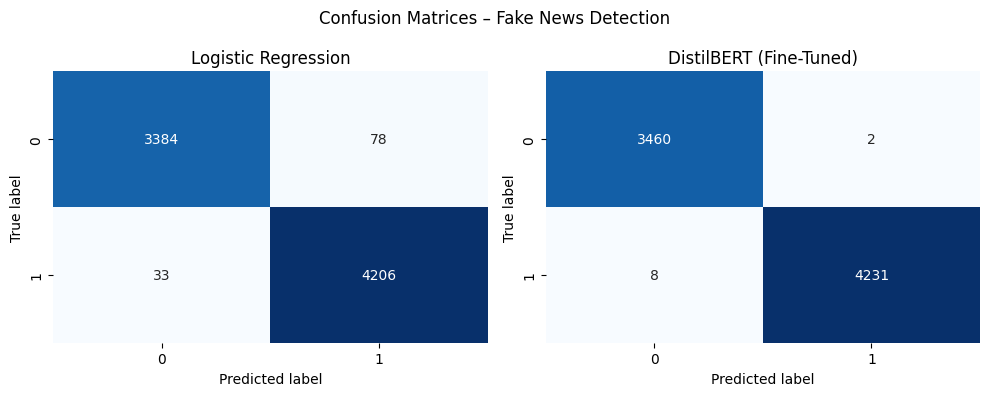

In [13]:
# confusion matrix değerlerini yeniden hesaplamıyorsan elle girilebilir
cm_lr = np.array([[3384, 78],
                  [33, 4206]])
cm_bert = np.array([[3460, 2],
                    [8, 4231]])

fig, axes = plt.subplots(1, 2, figsize=(10,4))

for ax, cm, title in zip(axes, [cm_lr, cm_bert], ["Logistic Regression", "DistilBERT (Fine-Tuned)"]):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")

plt.suptitle("Confusion Matrices – Fake News Detection", fontsize=12)
plt.tight_layout()
plt.savefig("../figures/confusion_matrices_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

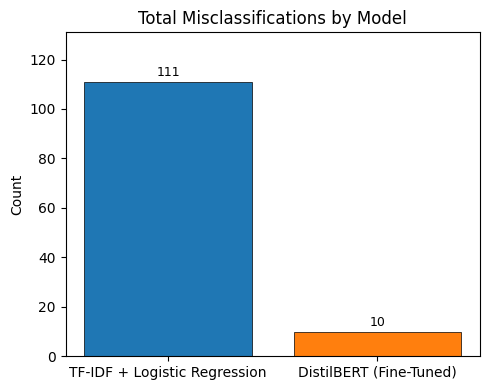

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Veriler
errors = {
    "Model": ["TF-IDF + Logistic Regression", "DistilBERT (Fine-Tuned)"],
    "Wrong Predictions": [78 + 33, 2 + 8]
}
err_df = pd.DataFrame(errors)

# 🎨 Aynı renk paleti (tab10 -> ilk iki renk)
colors = plt.get_cmap("tab10").colors[:2]  # 0: mavi, 1: turuncu

# Grafik
fig, ax = plt.subplots(figsize=(5, 4))
bars = ax.bar(
    err_df["Model"],
    err_df["Wrong Predictions"],
    color=colors,
    edgecolor="black",
    linewidth=0.5
)

ax.set_title("Total Misclassifications by Model", fontsize=12)
ax.set_xlabel("")
ax.set_ylabel("Count")
ax.set_ylim(0, max(err_df["Wrong Predictions"]) + 20)

# Değerleri çubukların üstüne yaz
for bar in bars:
    ax.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 1,
        int(bar.get_height()),
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.tight_layout()
plt.savefig("../figures/total_misclassifications.png", dpi=300, bbox_inches="tight")
plt.show()